# **House Price Prediction Notebook**

<a href="mailto:mhassaan.datascientist@gmail.com" target="_blank">
  <img src="https://img.icons8.com/ios-filled/50/000000/mail.png" alt="Email" width="50" height="50" />
</a>
<a href="https://www.kaggle.com/mhassaan1122" target="_blank">
  <img src="https://img.icons8.com/ios-filled/50/000000/kaggle.png" alt="Kaggle" width="50" height="50" />
</a>
<a href="https://www.youtube.com/@iammuhammadhassaan" target="_blank">
  <img src="https://img.icons8.com/ios-filled/50/000000/youtube.png" alt="YouTube" width="50" height="50" />
</a>
<a href="https://www.facebook.com/iammuhammadhassaan" target="_blank">
  <img src="https://img.icons8.com/ios-filled/50/000000/facebook.png" alt="Facebook" width="50" height="50" />
</a>
<a href="https://github.com/iammuhammadhassaaan" target="_blank">
  <img src="https://img.icons8.com/ios-filled/50/000000/github.png" alt="GitHub" width="50" height="50" />
</a>


**Author: Muhammad Hassaan**

---

# Dataset Description

## File Descriptions
- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data Fields
Here's a brief version of what you'll find in the data description file:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

Dataset Link: [Link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## Import Libraries

In [575]:
# improt libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px 

# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score 

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [576]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

# Data Exploration

In [577]:
# check head of the df_train
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [578]:
# check head of the df_test
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [579]:
# check info of the df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [580]:
# check info of the df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [581]:
# check the shape of the df_train
df_train.shape

(1460, 81)

In [582]:
# check the shape of the df_test
df_test.shape

(1459, 80)

In [583]:
# check summary statistics of the data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Missing Values

In [584]:
# check missing values in df_train
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [585]:
# check missing values in df_test
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [586]:
# check missing values in df_train
missing_values_train = df_train.isnull().sum()

# create a dataframe for detailes missing values information
missing_df_train = pd.DataFrame({
    'column_name': missing_values_train.index,
    'missing_values': missing_values_train.values,
    'missing_percentage': (missing_values_train.values / len(df_train)) * 100
})

# sort the dataframe by missing_percentage in descending order
missing_df_train = missing_df_train.sort_values(by='missing_values', ascending=False)

# display the dataframe
print("Missing Values Information:")
missing_df_train

Missing Values Information:


,column_name,missing_values,missing_percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
...,...,...,...
76,MoSold,0,0.000000
77,YrSold,0,0.000000
78,SaleType,0,0.000000
79,SaleCondition,0,0.000000


In [587]:
# check missing values in df_train
missing_values_test = df_train.isnull().sum()

# create a dataframe for detailes missing values information
missing_df_test = pd.DataFrame({
    'column_name': missing_values_test.index,
    'missing_values': missing_values_test.values,
    'missing_percentage': (missing_values_test.values / len(df_train)) * 100
})

# sort the dataframe by missing_percentage in descending order
missing_df_test = missing_df_test.sort_values(by='missing_values', ascending=False)

# display the dataframe
print("Missing Values Information:")
missing_df_test

Missing Values Information:


,column_name,missing_values,missing_percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
...,...,...,...
76,MoSold,0,0.000000
77,YrSold,0,0.000000
78,SaleType,0,0.000000
79,SaleCondition,0,0.000000


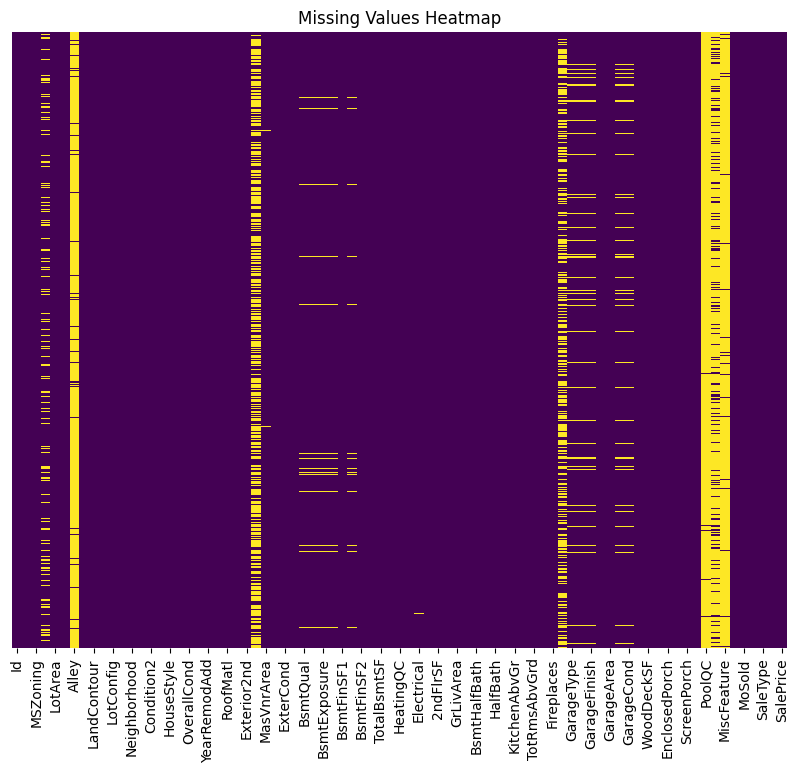

In [588]:
# plot heatmap of missing values in df_train
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

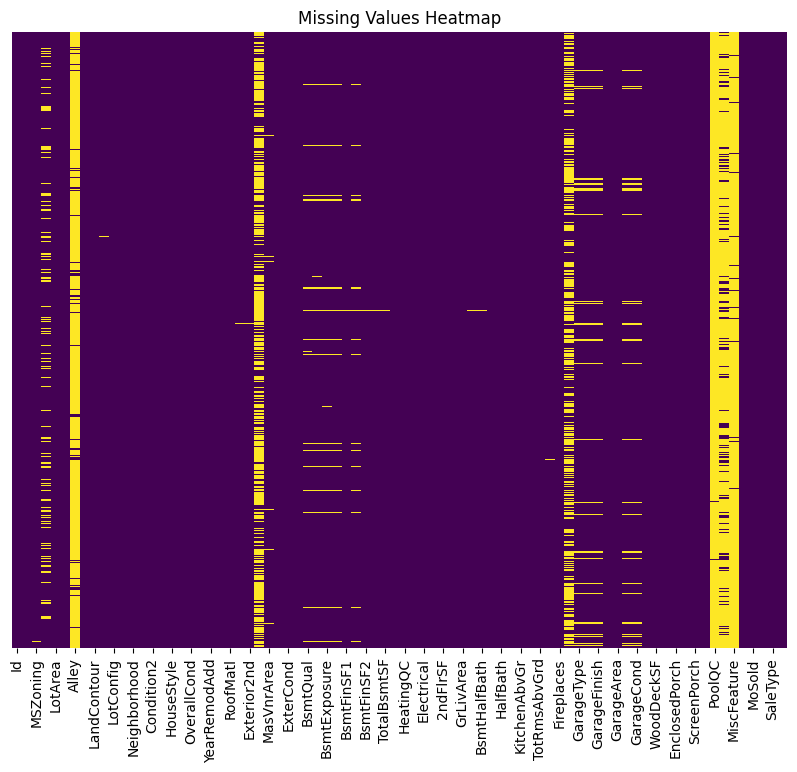

In [589]:
# plot heatmap of missing values in df_test
plt.figure(figsize=(10, 8))
sns.heatmap(df_test.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Handle Missing Values

In [590]:
# in missing_df_train
missing_df_train[missing_df_train["missing_percentage"] > 50]

,column_name,missing_values,missing_percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027


In [591]:
# in missing_df_test
missing_df_test[missing_df_test["missing_percentage"] > 50]

,column_name,missing_values,missing_percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027


In [592]:
# drop columns of high percenatge of missing values (e.g., more that 50%)
df_train.drop(missing_df_train[missing_df_train["missing_percentage"] > 50]["column_name"], axis=1, inplace=True)

# drop rows with any missing values
df_train.dropna(axis=0, inplace=True)

In [593]:
# drop columns of high percenatge of missing values (e.g., more that 50%)
df_test.drop(missing_df_test[missing_df_test["missing_percentage"] > 50]["column_name"], axis=1, inplace=True)

# drop rows with any missing values
df_test.dropna(axis=0, inplace=True)

In [594]:
# check if there is any missing values in df_train
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [595]:
# check if there is any missing values in df_test
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

# Data Pre-processing

In [596]:
# check and print the counts of data types in df_train and df_test
print("Data types in df_train:")
print(df_train.dtypes.value_counts())
print("\nData types in df_test:")
print(df_test.dtypes.value_counts())

Data types in df_train:
object     38
int64      35
float64     3
Name: count, dtype: int64

Data types in df_test:
object     38
int64      26
float64    11
Name: count, dtype: int64


In [597]:
# seperate features based on data types
object_columns = df_train.select_dtypes(include=['object']).columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

In [598]:
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [599]:
# Separate the target column from the training data
target_column = 'SalePrice'
X_train = df_train.drop(columns=[target_column])
y_train = df_train[target_column]
X_test = df_test.copy()

In [600]:
# Ensure test data has the same columns as training data
missing_columns_in_test = X_train.columns.difference(X_test.columns)
if len(missing_columns_in_test) > 0:
    raise ValueError(f"Missing columns in test data: {missing_columns_in_test}")

In [601]:
# Define a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns)
    ],
    remainder='passthrough'
)

In [602]:
# Apply the transformations to the training dataset
X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

In [603]:
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [604]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,84,0,0,0,0,0,4,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,...,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,2904,20,RL,88.0,11577,Pave,Reg,Lvl,AllPub,Inside,...,225,0,0,0,0,0,9,2006,New,Partial
1446,2907,160,RM,41.0,2665,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [605]:
# Apply the same transformations to the test dataset
X_test_processed = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [606]:
y_train.head()

1    181500
2    223500
3    140000
4    250000
6    307000
Name: SalePrice, dtype: int64

In [607]:
# Add the target column back to the training data if needed
df_train_processed = pd.concat([X_train_processed, y_train.reset_index(drop=True)], axis=1)

In [608]:
# Keep the 'Id' column from df_train
train_ids = df_train['Id'].copy()

# Reattach the 'Id' column back to df_train_processed
df_train_processed['Id'] = train_ids.values

In [609]:
df_train_processed['Id']

0         2
1         3
2         4
3         5
4         7
       ... 
578    1448
579    1452
580    1456
581    1457
582    1458
Name: Id, Length: 583, dtype: int64

## Model Building

In [610]:
# split the data 
X_train, X_val, y_train, y_val = train_test_split(df_train_processed, y_train, test_size=0.2, random_state=42)

## Random Forest

In [613]:
# Define the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [614]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_rf_model.predict(X_val)

# Evaluate the model
rmse_rf = mean_squared_error(y_val, y_pred, squared=False)
r2_rf = r2_score(y_val, y_pred)

print(f"Best Random Forest Model Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

Best Random Forest Model Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 5908.0323
R²: 0.9947


## Save the Models

In [615]:
import joblib

# Save Random Forest model
joblib.dump(best_rf_model, '../models/random_forest_model_2.pkl')

['../models/random_forest_model_2.pkl']

## Load the Models

In [616]:
# Load Random Forest model
loaded_rf_model = joblib.load('../models/random_forest_model_2.pkl')

## Create a Submission File

In [653]:
df_test = pd.read_csv("../data/test.csv")

In [654]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [655]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_test is your DataFrame
numerical_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                   'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                   'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                   'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# Create a new DataFrame with just the numerical columns
df_numerical = df_test[numerical_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convert the scaled data back to a DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

# Add the scaled numerical data back to the original DataFrame
df_test_scaled = df_test.copy()
df_test_scaled[numerical_cols] = df_numerical_scaled

In [656]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convert the scaled data back to a DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

# Add the scaled numerical data back to the original DataFrame
df_test_scaled = df_test.copy()
df_test_scaled[numerical_cols] = df_numerical_scaled


In [659]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define categorical columns
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                     'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                     'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                     'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                     'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
df_categorical_encoded = encoder.fit_transform(df_test[categorical_cols])



In [660]:
# predict the model
y_pred = loaded_rf_model.predict(df_test_scaled)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 1stFlrSF
- 2ndFlrSF
- 3SsnPorch
- Alley
- BedroomAbvGr
- ...
Feature names seen at fit time, yet now missing:
- SalePrice
- cat__BldgType_1Fam
- cat__BldgType_2fmCon
- cat__BldgType_Duplex
- cat__BldgType_Twnhs
- ...
